<a href="https://colab.research.google.com/github/HiebertDiogo/Paradigmas-de-ML/blob/main/Modelo%20de%20Predi%C3%A7%C3%A3o%20de%20Aluguel%20AirBnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pd.set_option("display.max_rows", 20000)
pd.set_option("display.max_columns", 20000)

In [ ]:
# Caminho de acesso para os dados do Quarto Trimestre de 2024 do Airbnb RJ
path = '/content/drive/Shareddrives/Visualização de Dados/listings.csv'

In [ ]:
df = pd.read_csv(path)

In [ ]:
print(df.shape)
df.head()

(39499, 75)


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,271975,https://www.airbnb.com/rooms/271975,20241227033009,2024-12-27,city scrape,Unbelievable Ocean View Apartment,NaN,"If you like hiking, you have to get on this tr...",https://a0.muscache.com/pictures/4563200/4ea0f...,1423140,https://www.airbnb.com/users/show/1423140,Maria,2011-11-19,"Rio de Janeiro, Brazil","We are both artists and producers, we love tra...",a few days or more,0%,0%,f,https://a0.muscache.com/im/users/1423140/profi...,https://a0.muscache.com/im/users/1423140/profi...,Vidigal,1.0,3.0,"['email', 'phone']",t,t,"Rio de Janeiro, Brazil",Vidigal,NaN,-22.99508,-43.23604,Entire rental unit,Entire home/apt,4,1.0,1 bath,2.0,2.0,"[""Essentials"", ""Shampoo"", ""Washer"", ""Smoking a...",$236.00,1,90,1,1,90,90,1.0,90.0,NaN,t,0,0,0,271,2024-12-27,7,0,0,2013-02-16,2019-10-05,4.14,4.33,3.67,4.33,4.67,4.33,4.00,NaN,f,1,1,0,0,0.05
1,272335,https://www.airbnb.com/rooms/272335,20241227033009,2024-12-28,city scrape,EXCELENTE APARTAMENTO EM COPACABANA,The apartment has 30m2 with connecting bedroom...,The beauty of my Copacabana beach. This needs...,https://a0.muscache.com/pictures/2828835/256cd...,7506316,https://www.airbnb.com/users/show/7506316,Vitor,2013-07-15,"Rio de Janeiro, Brazil","Sou Vitor Hugo, filho de Ugo e Eliete, profess...",NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/398ef...,https://a0.muscache.com/im/pictures/user/398ef...,NaN,3.0,3.0,"['email', 'phone']",t,f,"Rio de Janeiro, Brazil",Copacabana,NaN,-22.96230,-43.17389,Entire rental unit,Entire home/apt,4,1.0,1 bath,1.0,1.0,"[""Essentials"", ""Cooking basics"", ""32 inch HDTV...",$723.00,3,29,1,5,1125,1125,3.0,1125.0,NaN,t,4,27,55,322,2024-12-28,367,54,3,2011-12-06,2024-12-14,4.92,4.91,4.87,4.97,4.97,4.97,4.86,NaN,t,2,2,0,0,2.31
2,272631,https://www.airbnb.com/rooms/272631,20241227033009,2024-12-28,city scrape,Comfort em Copacabana,The apartment is located in the Shopping dos A...,NaN,https://a0.muscache.com/pictures/airflow/Hosti...,1426830,https://www.airbnb.com/users/show/1426830,Neyde,2011-11-20,"Rio de Janeiro, Brazil",SOU PROFESSORA DE HISTÓRIA. \r\nADORO MÚSICA E...,within an hour,100%,100%,t,https://a0.muscache.com/im/pictures/user/63796...,https://a0.muscache.com/im/pictures/user/63796...,Copacabana,6.0,6.0,"['email', 'phone']",t,t,NaN,Copacabana,NaN,-22.96750,-43.18666,Private room in rental unit,Private room,2,1.0,1 shared bath,1.0,2.0,"[""Essentials"", ""Long term stays allowed"", ""Sha...","$1,146.00",2,30,2,4,1125,1125,2.0,1125.0,NaN,t,26,56,86,333,2024-12-28,32,3,0,2014-07-01,2024-05-06,5.00,5.00,4.94,4.94,5.00,4.97,4.94,NaN,t,5,3,2,0,0.25
3,273261,https://www.airbnb.com/rooms/273261,20241227033009,2024-12-28,city scrape,Amazing Huge A

# Seleção de atributos

Muitos dos atributos podem ser excluídos manualmente, pois claramente não terão contribuição para o modelo em nenhum aspecto.

Sendo assim, selecionamos aqueles com potencial de utilidade.

In [ ]:
# Link: https://www.airbnb.com/rooms/ + id
# Mantendo
selected = [
    'accommodates',
    'bedrooms',
    'beds',
    'bathrooms',
    'latitude',
    'longitude',
    'neighbourhood_cleansed',
    'maximum_nights',
    'minimum_nights',
    'room_type',
    'last_review',
    'price',
]

rio = df[selected]
rio.rename(columns = {'neighbourhood_cleansed':'neighbourhood'}, inplace = True)

print(rio.shape)
rio.head(10)

(39499, 12)


<ipython-input-6-3aec9d4f0c17>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rio.rename(columns = {'neighbourhood_cleansed':'neighbourhood'}, inplace = True)


,accommodates,bedrooms,beds,bathrooms,latitude,longitude,neighbourhood,maximum_nights,minimum_nights,room_type,last_review,price
0,4,2.0,2.0,1.0,-22.99508,-43.23604,Vidigal,90,1,Entire home/apt,2019-10-05,$236.00
1,4,1.0,1.0,1.0,-22.96230,-43.17389,Copacabana,29,3,Entire home/apt,2024-12-14,$723.00
2,2,1.0,2.0,1.0,-22.96750,-43.18666,Copacabana,30,2,Private room,2024-05-06,"$1,146.00"
3,6,3.0,3.0,3.5,-22.98632,-43.22936,Leblon,7,2,Entire home/apt,NaN,"$6,742.00"
4,1,1.0,1.0,1.0,-22.91825,-43.17872,Santa Teresa,200,60,Private room,2024-06-22,$61.00
5,6,2.0,6.0,2.0,-22.97542,-43.19857,Lagoa,420,2,Entire home/apt,2024-12-18,"$1,411.00"
6,6,2.0,5.0,2.5,-22.98161,-43.22189,Leblon,1125,3,Entire home/apt,2023-06-09,$703.00
7,1,1.0,1.0,1.0,-22.91709,-43.18068,Santa Teresa,180,30,Private room,2023-02-27,$59.00
8,3,1.0,2.0,1.0,-22.91984,-43.18650,Santa Teresa,1125,4,Entire home/apt,2024-12-24,$225.00
9,2,0.0,1.0,1.0,-22.98069,-43.19277,Copacabana,90,6,Entire home/apt,2024-11-17,$759.00


In [ ]:
summary = pd.DataFrame({
    'Data Type': rio.dtypes,
    'Missing Values': rio.isna().sum()
})
display(summary)

,Data Type,Missing Values
accommodates,int64,0
bedrooms,float64,523
beds,float64,2869
bathrooms,float64,2890
latitude,float64,0
longitude,float64,0
neighbourhood,object,0
maximum_nights,int64,0
minimum_nights,int64,0
room_type,object,0


# Identificação e remoção de instâncias sem avaliação recente

É preciso remover todas as unidades que não foram avaliadas, pois elas não agregam valor para análise.
Além de considerar que unidades que não foram avaliadas desde 2020, podem estar com suas atividades 'inativas'

In [ ]:
# Garantindo a conversão de last_review para o tipo datatime
rio['last_review'] = pd.to_datetime(rio['last_review'].copy())

# Estabelecendo uma data mínima, a fim de desconsiderar possíveis imóveis inativos
min_data = pd.to_datetime('2020-01-01')

# Filtrando os parâmetros que serão descartados
rio_under_2020 = rio.loc[(rio['last_review'] < min_data) | rio.last_review.isna()]

print("Dataset atual: ", rio.shape)
print("Parte a ser removida: ", rio_under_2020.shape)
print("Representação do valores nulos da parte removida: ", rio.loc[rio['last_review'].isna()].shape)

# Realizando a elimininação dos valores filtrados
rio = rio.loc[~rio.index.isin(rio_under_2020.index)]
rio.drop('last_review', axis=1, inplace=True)
display(rio.shape)

# Precisam ser tratadas as seguinte colunas: bedrooms, beds, bathrooms
rio.isna().sum()

Dataset atual:  (39499, 12)
Parte a ser removida:  (11053, 12)
Representação do valores nulos da parte removida:  (10419, 12)


<ipython-input-8-8422037f9fd2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rio['last_review'] = pd.to_datetime(rio['last_review'].copy())
<ipython-input-8-8422037f9fd2>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rio.drop('last_review', axis=1, inplace=True)


(28446, 11)

,0
accommodates,0
bedrooms,352
beds,1983
bathrooms,1984
latitude,0
longitude,0
neighbourhood,0
maximum_nights,0
minimum_nights,0
room_type,0


# Remoção de instância com algum dado faltante

Como temos muitas instâncias e o número delas com dados faltantes é insignificante em relação ao total, vamos nos livrar delas em vez de tentar preencher os dados.

In [ ]:
# Remoção das instâncias que têm algum dado faltante
rio.dropna(subset=['bedrooms'], axis= 0, inplace=True)
rio.dropna(subset=['beds'], axis= 0, inplace=True)
rio.dropna(subset=['bathrooms'], axis= 0, inplace=True)
rio.dropna(subset=['price'], axis= 0, inplace=True)

# Para mostrar que não há mais nenhuma instância sem algum dado
display(rio.shape)
rio.isna().sum()

(26429, 11)

,0
accommodates,0
bedrooms,0
beds,0
bathrooms,0
latitude,0
longitude,0
neighbourhood,0
maximum_nights,0
minimum_nights,0
room_type,0


# Remoção de outliers

In [ ]:
# Removendo instâncias com 25 camas ou mais
print(rio.shape)
rio = rio[ rio['beds'] < 25 ]
print(rio.shape)

(26429, 11)
(26415, 11)


# Tratamento de strings

Alguns dos atributos selecionados são strings, e devem ser tratados para que possam ser utilizados nos métodos de Machine Learning.

In [ ]:
# Tratamento da coluna price
rio.loc[:, 'price'] = rio['price'].transform(lambda x: str(x).replace('$', '').replace(',', '').replace(' ', ''))
rio['price'] = rio['price'].astype(float)

rio.head()

,accommodates,bedrooms,beds,bathrooms,latitude,longitude,neighbourhood,maximum_nights,minimum_nights,room_type,price
1,4,1.0,1.0,1.0,-22.96230,-43.17389,Copacabana,29,3,Entire home/apt,723.0
2,2,1.0,2.0,1.0,-22.96750,-43.18666,Copacabana,30,2,Private room,1146.0
4,1,1.0,1.0,1.0,-22.91825,-43.17872,Santa Teresa,200,60,Private room,61.0
5,6,2.0,6.0,2.0,-22.97542,-43.19857,Lagoa,420,2,Entire home/apt,1411.0
6,6,2.0,5.0,2.5,-22.98161,-43.22189,Leblon,1125,3,Entire home/apt,703.0


In [ ]:
rio.select_dtypes(include='object').columns.to_list()

['neighbourhood', 'room_type']

In [ ]:
rio.room_type.value_counts()

,count
room_type,
Entire home/apt,21855
Private room,4370
Shared room,170
Hotel room,20


In [ ]:
# Verificando a presença de instancias duplicadas
dupes = rio.duplicated()
sum(dupes)

20

In [ ]:
# Remoção dos dados duplicados
rio = rio.drop_duplicates(keep='first')

In [ ]:
# Verificando a presença de instancias duplicadas
dupes = rio.duplicated()
sum(dupes)

0

In [ ]:
rio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26395 entries, 1 to 39346
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   accommodates    26395 non-null  int64  
 1   bedrooms        26395 non-null  float64
 2   beds            26395 non-null  float64
 3   bathrooms       26395 non-null  float64
 4   latitude        26395 non-null  float64
 5   longitude       26395 non-null  float64
 6   neighbourhood   26395 non-null  object 
 7   maximum_nights  26395 non-null  int64  
 8   minimum_nights  26395 non-null  int64  
 9   room_type       26395 non-null  object 
 10  price           26395 non-null  float64
dtypes: float64(6), int64(3), object(2)
memory usage: 2.4+ MB


In [ ]:
neighbourhood = np.sort(rio['neighbourhood'].unique())
print(len(neighbourhood))
display(neighbourhood)

146


array(['Abolição', 'Alto da Boa Vista', 'Andaraí', 'Anil', 'Bancários',
       'Bangu', 'Barra da Tijuca', 'Barra de Guaratiba', 'Barros Filho',
       'Benfica', 'Bento Ribeiro', 'Bonsucesso', 'Botafogo',
       'Brás de Pina', 'Cachambi', 'Cacuia', 'Camorim', 'Campinho',
       'Campo Grande', 'Cascadura', 'Catete', 'Catumbi', 'Cavalcanti',
       'Centro', 'Cidade Nova', 'Cidade Universitária', 'Cidade de Deus',
       'Cocotá', 'Coelho Neto', 'Colégio', 'Complexo do Alemão',
       'Copacabana', 'Cosme Velho', 'Cosmos', 'Curicica', 'Del Castilho',
       'Deodoro', 'Encantado', 'Engenheiro Leal', 'Engenho Novo',
       'Engenho da Rainha', 'Engenho de Dentro', 'Estácio', 'Flamengo',
       'Freguesia (Ilha)', 'Freguesia (Jacarepaguá)', 'Galeão', 'Gamboa',
       'Gardênia Azul', 'Glória', 'Grajaú', 'Grumari', 'Guadalupe',
       'Guaratiba', 'Gávea', 'Higienópolis', 'Honório Gurgel', 'Humaitá',
       'Inhaúma', 'Inhoaíba', 'Ipanema', 'Irajá', 'Itanhangá',
       'Jacarepaguá', 'Ja

In [ ]:
# Dataframe de estatísticas descritivas para as colunas que não fazem parte de
# One-Hot-Encoding
colunas_estatisticas = [
    'accommodates',
    'bedrooms',
    'beds',
    'bathrooms',
    'latitude',
    'longitude',
    'maximum_nights',
    'minimum_nights',
    'price'
]

In [ ]:
rio.describe()

,accommodates,bedrooms,beds,bathrooms,latitude,longitude,maximum_nights,minimum_nights,price
count,26395.000000,26395.000000,26395.000000,26395.000000,26395.000000,26395.000000,26395.000000,26395.000000,26395.000000
mean,3.905853,1.468687,2.324683,1.441447,-22.967330,-43.242972,393.846524,3.337678,1034.635840
std,2.122428,0.932862,1.680237,0.824445,0.034012,0.096169,406.411425,21.723340,1632.809155
min,1.000000,0.000000,0.000000,0.000000,-23.072920,-43.701286,1.000000,1.000000,50.000000
25%,2.000000,1.000000,1.000000,1.000000,-22.984243,-43.261205,60.000000,1.000000,400.000000
50%,4.000000,1.000000,2.000000,1.000000,-22.972690,-43.192673,365.000000,2.000000,706.000000
75%,5.000000,2.000000,3.000000,2.000000,-22.958868,-43.184202,365.000000,3.000000,1150.000000
max,16.000000,25.000000,24.000000,20.000000,-22.749950,-43.104400,1125.000000,999.000000,51428.000000


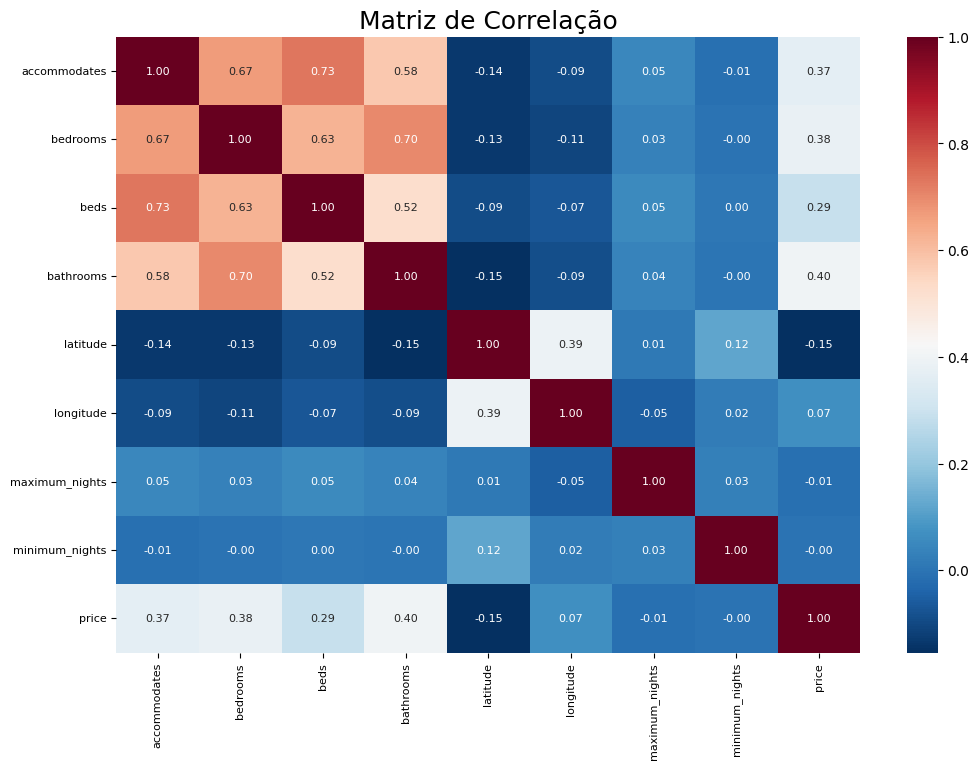

In [ ]:
# Visualizando o Mapa de Correlação entre as Variáveis
colunas_correlacao = colunas_estatisticas ## == col_num = rio_target_encoding.select_dtypes(include=["int","float"]).columns

plt.figure(figsize=(12, 8))
sns.heatmap(rio[colunas_correlacao].corr(),
            annot=True,
            fmt=".2f",
            cmap="RdBu_r",
            annot_kws={"size": 8})# Ajusta o tamanho da fonte dentro das células

# Ajusta o tamanho das labels do eixo X e Y
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.title("Matriz de Correlação", fontsize=18)  # Ajusta o tamanho do título
plt.show()

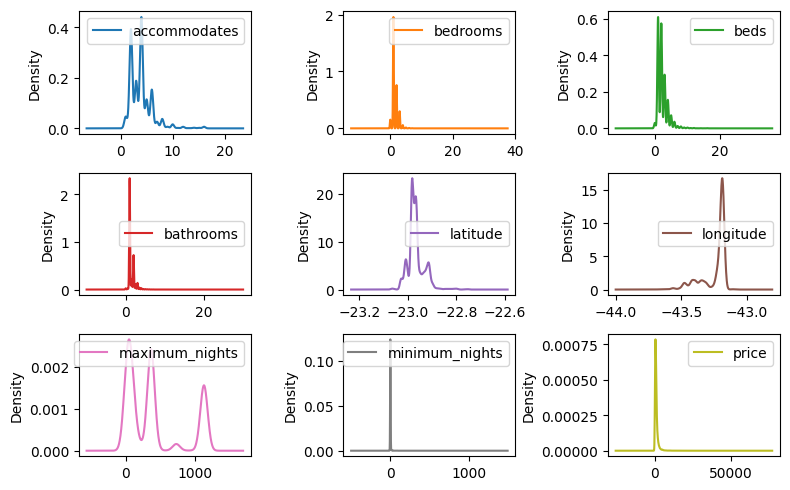

In [ ]:
col_num = rio.select_dtypes(include=["int","float"]).columns

rio[col_num].plot(kind="density", #representação da distribuição da variável numérica
          subplots=True,
          sharex=False,
          layout=(5,3),
          figsize=(8,8))
plt.tight_layout()
plt.show()

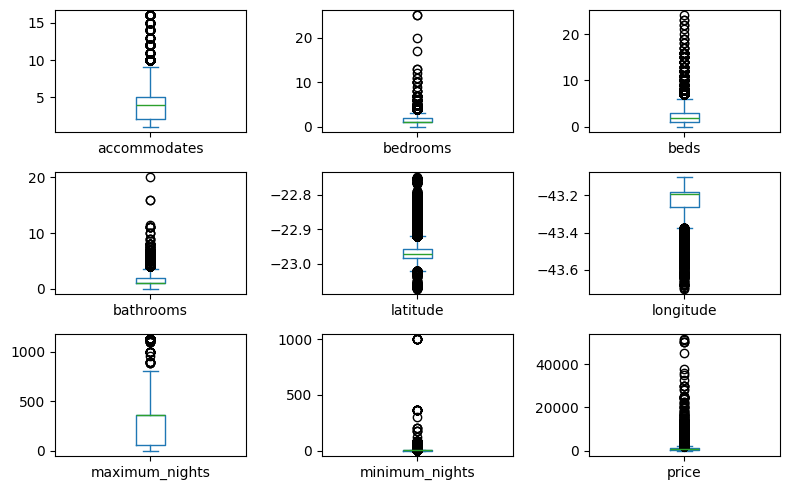

In [ ]:
rio[col_num].plot(kind="box", #representação da distribuição da variável numérica
          subplots=True,
          sharex=False,
          layout=(5,3),
          figsize=(8,8))
plt.tight_layout()
plt.show()

<ipython-input-24-cfb4bb581e47>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  rio.hist(ax=ax)


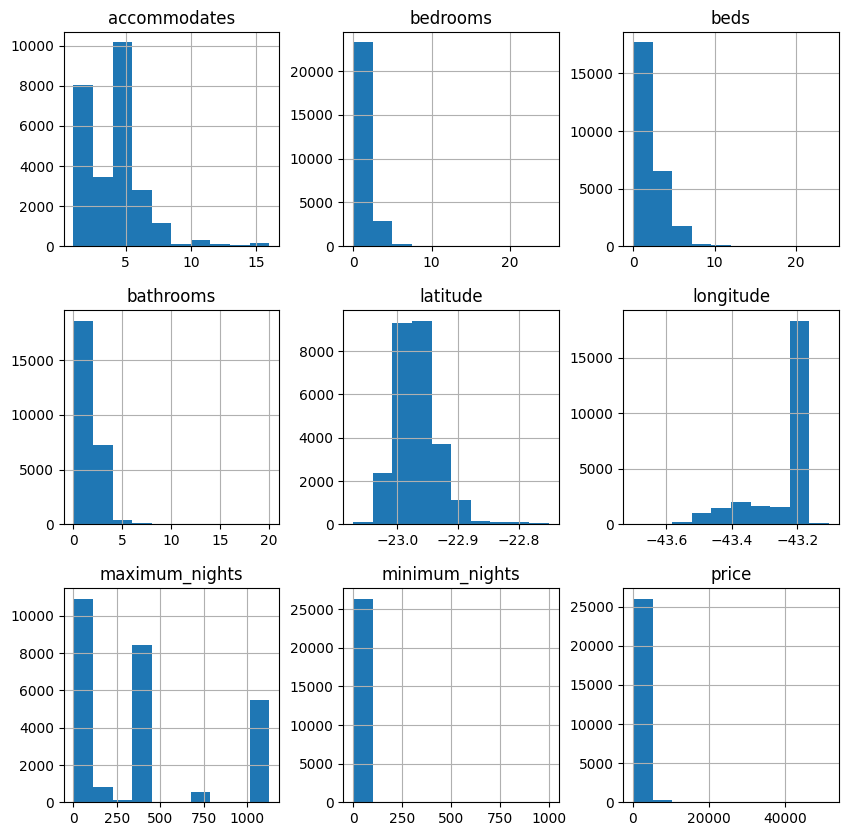

In [ ]:
# Histograma ajuda a entender a assimetria das variáveis.
fig, ax = plt.subplots(1,1,figsize=(10,10))
rio.hist(ax=ax)
plt.show()

## Seguiremos com a Seguinte sequências de Encodings:
  - One-Hot Encoding de room_type
  - Target Encoding de neighbourhood
  - One-hot Encoding de neighbourhood

### Divisão em Treinamento e Teste


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [ ]:
X = rio.drop(columns=['price'])
y = rio['price']

In [ ]:
# Divisião do Dataset em atributos de Alvo e de Previsão
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### One-Hot Encoding do room_type

In [ ]:
room_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Realiza o Encoding de acordo com a coluna no grupo de Treinamento
room_train = room_encoder.fit_transform(X_train[['room_type']])
room_test = room_encoder.transform(X_test[['room_type']])

# Armazenando o nome das colunas
room_cols = room_encoder.get_feature_names_out(['room_type'])
room_cols = [col.replace('room_type_', '') for col in room_cols]

# Convertendo pra DataFrame
room_train_df = pd.DataFrame(room_train, columns=room_cols, index=X_train.index)
room_test_df = pd.DataFrame(room_test, columns=room_cols, index=X_test.index)

In [ ]:
X_train =  X_train.join(room_train_df)
X_test = X_test.join(room_test_df)

In [ ]:
# Removendo a coluna usada no One-hot Encoding
X_train.drop('room_type', axis=1, inplace =True)
X_test.drop('room_type', axis=1, inplace =True)

In [ ]:
display(X_train.shape)
display(X_test.shape)

X_train.head()

(21116, 13)

(5279, 13)

,accommodates,bedrooms,beds,bathrooms,latitude,longitude,neighbourhood,maximum_nights,minimum_nights,Entire home/apt,Hotel room,Private room,Shared room
3053,6,2.0,2.0,2.5,-22.983560,-43.230180,Leblon,900,1,1.0,0.0,0.0,0.0
22308,8,3.0,6.0,3.0,-22.921567,-43.189449,Santa Teresa,10,5,1.0,0.0,0.0,0.0
34361,2,1.0,1.0,1.0,-22.908860,-43.176880,Centro,1125,1,1.0,0.0,0.0,0.0
9934,6,1.0,4.0,1.0,-22.977607,-43.234181,Gávea,730,2,1.0,0.0,0.0,0.0
5534,6,0.0,6.0,1.0,-22.980410,-43.191350,Copacabana,30,2,1.0,0.0,0.0,0.0


### Tratamento com o uso do Target Encoding

In [ ]:
# Target Encoding com regularização e smoothing
regularizacao = 10

global_mean = y_train.mean()
df1 = X_train.copy()
df1['price'] = y_train

agg = df1.groupby('neighbourhood')['price'].agg(['mean', 'count'])
smooth = (agg['mean'] * agg['count'] + global_mean * regularizacao) / (agg['count'] + regularizacao)

In [ ]:
# Fazendo uma cópia do Grupo de Teste e Treinamento
X_tar_train = X_train.copy()
X_tar_test = X_test.copy()
y_tar_train = y_train.copy()
y_tar_test = y_test.copy()


# Atribuição dos valores encontrados para a nova coluna  (nova representação)
X_tar_train['neighbour'] = X_tar_train['neighbourhood'].map(smooth)
standard_values = X_tar_train['neighbour'].mean()

X_tar_test['neighbour'] = X_tar_test['neighbourhood'].map(smooth).fillna(standard_values)

In [ ]:
# Remoção da Coluna usada no Encoding
X_tar_train.drop('neighbourhood', axis=1, inplace =True)
X_tar_test.drop('neighbourhood', axis=1, inplace =True)

In [ ]:
display(X_train.shape)
display(X_test.shape)

(21116, 13)

(5279, 13)

In [ ]:
X_tar_train.head()

,accommodates,bedrooms,beds,bathrooms,latitude,longitude,maximum_nights,minimum_nights,Entire home/apt,Hotel room,Private room,Shared room,neighbour
3053,6,2.0,2.0,2.5,-22.983560,-43.230180,900,1,1.0,0.0,0.0,0.0,1533.334445
22308,8,3.0,6.0,3.0,-22.921567,-43.189449,10,5,1.0,0.0,0.0,0.0,665.473719
34361,2,1.0,1.0,1.0,-22.908860,-43.176880,1125,1,1.0,0.0,0.0,0.0,475.141358
9934,6,1.0,4.0,1.0,-22.977607,-43.234181,730,2,1.0,0.0,0.0,0.0,1039.182134
5534,6,0.0,6.0,1.0,-22.980410,-43.191350,30,2,1.0,0.0,0.0,0.0,1175.879243


In [ ]:
# Display the results
print("Training Features (X_train):", X_tar_train.shape)
print("\nTraining Target (y_train):", y_tar_train.shape)
print("\nTesting Features (X_test):", X_tar_test.shape)
print("\nTesting Target (y_test):", y_tar_test.shape)

Training Features (X_train): (21116, 13)

Training Target (y_train): (21116,)

Testing Features (X_test): (5279, 13)

Testing Target (y_test): (5279,)


In [ ]:
X_tar_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21116 entries, 3053 to 32234
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   accommodates     21116 non-null  int64  
 1   bedrooms         21116 non-null  float64
 2   beds             21116 non-null  float64
 3   bathrooms        21116 non-null  float64
 4   latitude         21116 non-null  float64
 5   longitude        21116 non-null  float64
 6   maximum_nights   21116 non-null  int64  
 7   minimum_nights   21116 non-null  int64  
 8   Entire home/apt  21116 non-null  float64
 9   Hotel room       21116 non-null  float64
 10  Private room     21116 non-null  float64
 11  Shared room      21116 non-null  float64
 12  neighbour        21116 non-null  float64
dtypes: float64(10), int64(3)
memory usage: 2.8 MB


In [ ]:
X_tar_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5279 entries, 8233 to 17983
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   accommodates     5279 non-null   int64  
 1   bedrooms         5279 non-null   float64
 2   beds             5279 non-null   float64
 3   bathrooms        5279 non-null   float64
 4   latitude         5279 non-null   float64
 5   longitude        5279 non-null   float64
 6   maximum_nights   5279 non-null   int64  
 7   minimum_nights   5279 non-null   int64  
 8   Entire home/apt  5279 non-null   float64
 9   Hotel room       5279 non-null   float64
 10  Private room     5279 non-null   float64
 11  Shared room      5279 non-null   float64
 12  neighbour        5279 non-null   float64
dtypes: float64(10), int64(3)
memory usage: 706.4 KB


In [ ]:
X_tar_test.head()

,accommodates,bedrooms,beds,bathrooms,latitude,longitude,maximum_nights,minimum_nights,Entire home/apt,Hotel room,Private room,Shared room,neighbour
8233,2,1.0,2.0,1.0,-23.003980,-43.340360,90,2,0.0,0.0,1.0,0.0,1139.408004
30340,4,2.0,2.0,2.0,-22.983853,-43.192201,50,2,1.0,0.0,0.0,0.0,1175.879243
11863,2,1.0,2.0,1.0,-22.950330,-43.167600,365,2,1.0,0.0,0.0,0.0,901.605797
25272,2,1.0,1.0,1.0,-22.945078,-43.182667,365,2,1.0,0.0,0.0,0.0,657.948246
23395,3,2.0,2.0,1.0,-22.982898,-43.221484,60,3,1.0,0.0,0.0,0.0,1533.334445


### Tratamento com One-Hot Encoding

In [ ]:
# Fazendo uma cópia do Grupo de Teste e Treinamento
X_one_train = X_train.copy()
X_one_test = X_test.copy()
y_one_train = y_train.copy()
y_one_test = y_test.copy()

# Realiza o Encoding de acordo com a coluna no grupo de Treinamento
neighbour_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

neighbour_train = neighbour_encoder.fit_transform(X_one_train[['neighbourhood']])
neighbour_test = neighbour_encoder.transform(X_one_test[['neighbourhood']])

# Armazenando o nome das colunas
neighbour_cols = neighbour_encoder.get_feature_names_out(['neighbourhood'])
neighbour_cols = [col.replace('neighbourhood_', '') for col in neighbour_cols]


# Converte em Dataframe
neighbour_train_df = pd.DataFrame(neighbour_train, columns=neighbour_cols, index=X_one_train.index)
neighbour_test_df = pd.DataFrame(neighbour_test, columns=neighbour_cols, index=X_one_test.index)

In [ ]:
X_one_train =  X_one_train.join(neighbour_train_df)
X_one_test = X_one_test.join(neighbour_test_df)

In [ ]:
# Remoção da Coluna usada no Encoding
X_one_train.drop('neighbourhood', axis=1, inplace =True)
X_one_test.drop('neighbourhood', axis=1, inplace =True)

In [ ]:
X_one_train.head()

,accommodates,bedrooms,beds,bathrooms,latitude,longitude,maximum_nights,minimum_nights,Entire home/apt,Hotel room,Private room,Shared room,Abolição,Alto da Boa Vista,Andaraí,Anil,Bancários,Bangu,Barra da Tijuca,Barra de Guaratiba,Barros Filho,Benfica,Bento Ribeiro,Bonsucesso,Botafogo,Brás de Pina,Cachambi,Cacuia,Camorim,Campinho,Campo Grande,Cascadura,Catete,Catumbi,Cavalcanti,Centro,Cidade Nova,Cidade Universitária,Cidade de Deus,Cocotá,Coelho Neto,Colégio,Complexo do Alemão,Copacabana,Cosme Velho,Cosmos,Curicica,Del Castilho,Deodoro,Encantado,Engenheiro Leal,Engenho Novo,Engenho da Rainha,Engenho de Dentro,Estácio,Flamengo,Freguesia (Ilha),Freguesia (Jacarepaguá),Galeão,Gamboa,Gardênia Azul,Glória,Grajaú,Grumari,Guadalupe,Guaratiba,Gávea,Higienópolis,Honório Gurgel,Humaitá,Inhaúma,Inhoaíba,Ipanema,Irajá,Itanhangá,Jacarepaguá,Jacaré,Jardim América,Jardim Botânico,Jardim Carioca,Jardim Guanabara,Jardim Sulacap,Joá,Lagoa,Laranjeiras,Leblon,Leme,Lins de Vasconcelos,Madureira,Mangueira,Manguinhos,Maracanã,Marechal Hermes,Maria da Graça,Maré,Moneró,Méier,Olaria,Osvaldo Cruz,Paciência,Paquetá,Parada de Lucas,Parque Anchieta,Pavuna,Pechincha,Pedra de Guaratiba,Penha,Penha Circular,Piedade,Pilares,Pitangueiras,Portuguesa,Praça Seca,Praça da Bandeira,Quintino Bocaiúva,Ramos,Realengo,Recreio dos Bandeirantes,Riachuelo,Ribeira,Rio Comprido,Rocha,Rocha Miranda,Rocinha,Sampaio,Santa Cruz,Santa Teresa,Santo Cristo,Saúde,Senador Camará,Senador Vasconcelos,Sepetiba,São Conrado,São Cristóvão,São Francisco Xavier,Tanque,Taquara,Tauá,Tijuca,Todos os Santos,Tomás Coelho,Turiaçú,Urca,Vargem Grande,Vargem Pequena,Vasco da Gama,Vaz Lobo,Vicente de Carvalho,Vidigal,Vigário Geral,Vila Isabel,Vila Militar,Vila Valqueire,Vila da Penha,Zumbi,Água Santa
3053,6,2.0,2.0,2.5,-22.983560,-43.230180,900,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22308,8,3.0,6.0,3.0,-22.921567,-43.189449,10,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34361,2,1.0,1.0,1.0,-22.908860,-43.176880,1125,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9934,6,1.0,4.0,1.0,-22.977607,-43.234181,730,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [ ]:
# Display the results
print("Training Features (X_train):", X_one_train.shape)
print("\nTraining Target (y_train):", y_one_train.shape)
print("\nTesting Features (X_test):", X_one_test.shape)
print("\nTesting Target (y_test):", y_one_test.shape)

Training Features (X_train): (21116, 156)

Training Target (y_train): (21116,)

Testing Features (X_test): (5279, 156)

Testing Target (y_test): (5279,)


**** PLOTAR OS GRÁFICOS DOS DATASETS DE TREINAMENTO E TESTE E VER SE REMOVE OS OUTLIERS ****

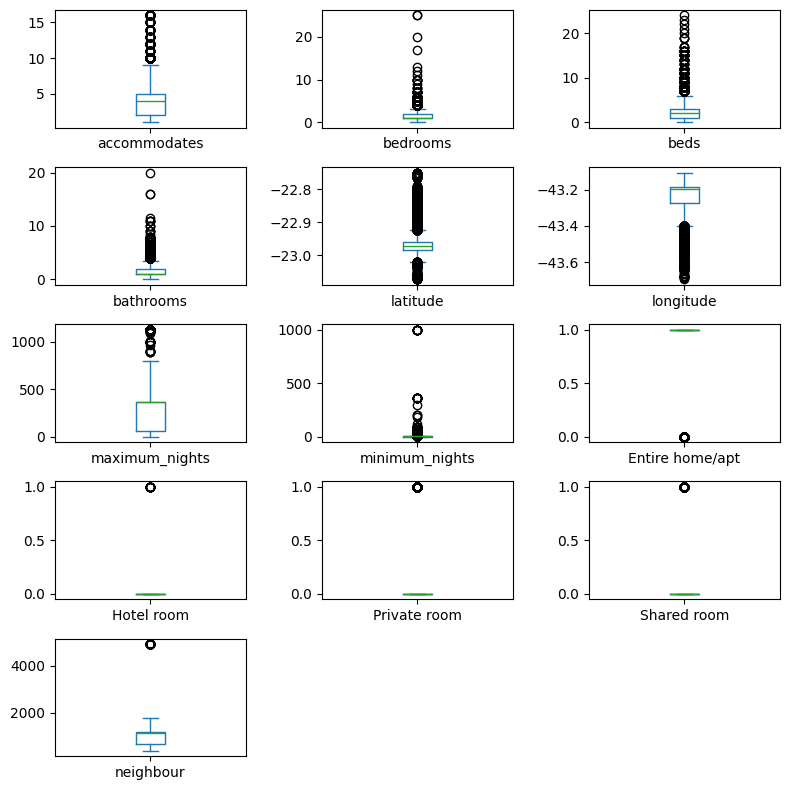

In [ ]:
col_num = X_tar_train.select_dtypes(include=["int","float"]).columns

X_tar_train[col_num].plot(kind="box", #representação da distribuição da variável numérica
          subplots=True,
          sharex=False,
          layout=(5,3),
          figsize=(8,8))
plt.tight_layout()
plt.show()

In [ ]:
outlier_rows = []
outlier_columns = [
    'minimum_nights',
    'maximum_nights',
    'bedrooms',
    'beds',
    'bathrooms'
]

for col in outlier_columns:
    Q1 = X_tar_train[col].quantile(0.25)
    Q3 = X_tar_train[col].quantile(0.75)
    IQR = X_tar_train[col].std()

    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR

    # Find rows where value is below or above the bounds
    outliers = X_tar_train[(X_tar_train[col] < lower_bound) | (X_tar_train[col] > upper_bound)]

    # Save row indices and feature name
    for idx in outliers.index:
        outlier_rows.append((
            idx,
            col,
            X_tar_train.loc[idx, col],
            X_tar_train.loc[idx, 'minimum_nights'],
            X_tar_train.loc[idx, 'maximum_nights'],
            X_tar_train.loc[idx, 'bedrooms'],
            X_tar_train.loc[idx, 'beds'],
            X_tar_train.loc[idx, 'bathrooms'],
            y_tar_train[idx]
          )
        )

# Convert to a DataFrame for easy visualization
outlier_df = pd.DataFrame(outlier_rows, columns=[
    "Index",
    "Feature",
    "Outlier_Value",
    'minimum_nights',
    'maximum_nights',
    'bedrooms',
    'beds',
    'bathrooms',
    'price'
  ]
)

print(outlier_df.shape)
outlier_df.sort_values(by='Outlier_Value', ascending=False).head(100)

(656, 9)


,Index,Feature,Outlier_Value,minimum_nights,maximum_nights,bedrooms,beds,bathrooms,price
29,9251,minimum_nights,999.0,999,1125,1.0,2.0,1.0,348.0
27,9196,minimum_nights,999.0,999,1125,1.0,2.0,1.0,316.0
22,6558,minimum_nights,999.0,999,1125,1.0,1.0,1.0,324.0
40,9250,minimum_nights,999.0,999,1125,1.0,2.0,1.0,361.0
41,9197,minimum_nights,999.0,999,1125,1.0,2.0,1.0,323.0
18,6565,minimum_nights,999.0,999,1125,1.0,2.0,1.0,307.0
24,7079,minimum_nights,999.0,999,1125,1.0,3.0,1.0,400.0
3,7191,minimum_nights,999.0,999,1125,0.0,1.0,1.0,272.0
6,9168,minimum_nights,999.0,999,1125,1.0,2.0,1.0,410.0
39,29931,minimum_nights,365.0,365,365,1.0,3.0,1.0,228.0


# Modelos de Rede Neural

## Modelo 1:

###Padronizando a nomenclatura

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

#Dados Targeting Enconding

X_train = X_tar_train.copy()
X_test = X_tar_test.copy()


y_train = y_tar_train.copy()
y_test = y_tar_test.copy()


In [ ]:
#Dados one hot enconding - Executar apenas uma ou outra separação de dataset

#X_train = X_one_train.copy()
#X_test = X_one_test.copy()
#y_train = y_one_train.copy()
#y_test = y_one_test.copy()


###Remoção de outliers após divisão

In [ ]:
#Aplicando regra simples para a remoção de Outliers - Pode ser aprimorado

#Verificando tamanho antes da remoção
print(y_train.shape)

#Calculando os quartis do y_train
q1 = y_train.quantile(0.25)
q3 = y_train.quantile(0.75)
iqr = q3 - q1

#Definindo limites
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

#Criando filtro para manter apenas valores dentro dos limites
filtro = (y_train >= limite_inferior) & (y_train <= limite_superior)

#Aplicando o filtro tanto no X_train quanto no y_train
X_train = X_train[filtro]
y_train = y_train[filtro]

#Verificando tamanho após da remoção
print(y_train.shape)


(21116,)
(19604,)


###Normalização

O MinMaxScaler() também foi testado e, apesar dos resultados não terem sido muito diferentes, o modelo foi mais rápido quando rodado com o StandardScaler()

In [ ]:
#Normalizando as entradas
scaler_X = StandardScaler()

X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

###Criando e configurando o modelo

Outras configurações de camadas ocultas taambém foram testadas, igualmente como a função de ativação 'tanh', mas essa configuração foi a que mostrou um melhor desempenho em relação ao resultado.

In [ ]:
#Criando e configurando o modelo
mlp = MLPRegressor(
    hidden_layer_sizes=(64, 32), #Definindo o tamanho das camandas ocultas
    activation='relu',           #O.B.S - Foi testado várias combinações diferentes de camadas ocultas,
    max_iter=500,                #mas o desempenho foi bem semelhante
    random_state=42,
    early_stopping=True,       #Permite a interrupção antecipada
    validation_fraction=0.2,   #Usa 20% do treino como validação
    n_iter_no_change=10,       #Interrompe depois de 10 épocas sem melhora
    verbose=True,              #Mostra o progresso do treinamento
)

mlp.fit(X_train, y_train)

#Fazendo as previsões
predictions = mlp.predict(X_test)

#Avaliando o modelo
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

print(f"Erro médio absoluto (MAE): {mae:.2f}")
print(f"Raiz do erro quadrático médio (RMSE): {rmse:.2f}")
print(f'Erro relativo absoluto médio: {(np.abs(predictions - y_test) / y_test * 100).mean()}')



Iteration 1, loss = 398821.39402489
Validation score: -2.327082
Iteration 2, loss = 367678.87138578
Validation score: -1.819420
Iteration 3, loss = 270243.65824464
Validation score: -0.738289
Iteration 4, loss = 146075.23768963
Validation score: 0.086878
Iteration 5, loss = 89086.71603426
Validation score: 0.299248
Iteration 6, loss = 77075.84178437
Validation score: 0.348486
Iteration 7, loss = 73006.92584900
Validation score: 0.374316
Iteration 8, loss = 70302.70197775
Validation score: 0.394017
Iteration 9, loss = 68234.01142592
Validation score: 0.407991
Iteration 10, loss = 66632.35030340
Validation score: 0.418766
Iteration 11, loss = 65309.15096113
Validation score: 0.427091
Iteration 12, loss = 64269.15976323
Validation score: 0.434109
Iteration 13, loss = 63434.67593108
Validation score: 0.438655
Iteration 14, loss = 62781.79004553
Validation score: 0.442456
Iteration 15, loss = 62230.90469299
Validation score: 0.445348
Iteration 16, loss = 61799.87102962
Validation score: 0.4

### Análise dos resultados

O modelo possui um Erro Relativo Absoluto Médio de pouco mais de 50%, então no geral suas regressões não estão se saindo muito bem

In [ ]:
import pandas as pd

# DataFrame para comparação das predições com os valores reais
comparison = pd.DataFrame({
    'Real': y_test,
    'Predicted': predictions,
    'Absolute Diff': y_test - predictions,
    'Relative Diff': (predictions - y_test) / y_test * 100,
    'Abs Relative Diff': np.abs((predictions - y_test) / y_test * 100)
})

# Ordenando em ordem crencente de erro relativo absoluto
comparison_sorted = comparison.sort_values(
    by='Abs Relative Diff',
    ascending=True
)

comparison_sorted.head(10)

,Real,Predicted,Absolute Diff,Relative Diff,Abs Relative Diff
2759,1000.0,1000.036138,-0.036138,0.003614,0.003614
16024,443.0,443.065066,-0.065066,0.014688,0.014688
22783,460.0,459.921276,0.078724,-0.017114,0.017114
7879,950.0,950.241933,-0.241933,0.025467,0.025467
22940,1342.0,1342.416346,-0.416346,0.031024,0.031024
14448,750.0,750.372818,-0.372818,0.049709,0.049709
11663,1396.0,1396.869071,-0.869071,0.062254,0.062254
30971,871.0,870.424553,0.575447,-0.066067,0.066067
18329,464.0,463.434415,0.565585,-0.121893,0.121893
11792,1000.0,998.737911,1.262089,-0.126209,0.126209


Erro relativo absoluto médio: 52.09169461647616


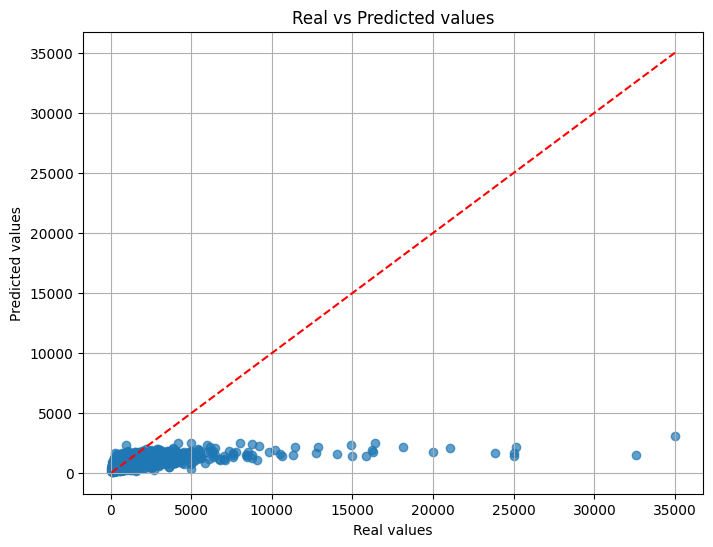

In [ ]:
import matplotlib.pyplot as plt

print(f'Erro relativo absoluto médio: {(np.abs(predictions - y_test) / y_test * 100).mean()}')

plt.figure(figsize=(8,6))
plt.scatter(y_test, predictions, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # perfect prediction line
plt.xlabel('Real values')
plt.ylabel('Predicted values')
plt.title('Real vs Predicted values')
plt.grid(True)
plt.show()

## Modelo 2: Focando nos dados mais comuns

O modelo acima se sai muito melhor naquelas instâncias de teste cujo valor vai até RS1500,00, aproximadamente.

Vamos procurar focar as instâncias de teste num subconjunto com valores de preço de até 5000 para ver o quão bem o modelo se sai. Considerando que ele já não vai bem com esses valores ou maiores, é de se imaginar que retirá-los talvez não faça tanta diferença, ao mesmo tempo que pode levá-lo a prever melhor os tipos de aluguel mais comuns.

Será que isso gera um overfitting?

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

#Dados Targeting Enconding

X_train = X_tar_train.copy()
X_test = X_tar_test.copy()


y_train = y_tar_train.copy()
y_test = y_tar_test.copy()


In [ ]:
#Aplicando regra simples para a remoção de Outliers - Pode ser aprimorado

#Verificando tamanho antes da remoção
print(y_train.shape)

#Calculando os quartis do y_train
q1 = y_train.quantile(0.25)
q3 = y_train.quantile(0.75)
iqr = q3 - q1

#Definindo limites
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

#Criando filtro para manter apenas valores dentro dos limites
filtro = (y_train >= limite_inferior) & (y_train <= limite_superior)

#Aplicando o filtro tanto no X_train quanto no y_train
X_train = X_train[filtro]
y_train = y_train[filtro]

#Verificando tamanho após da remoção
print(y_train.shape)


(21116,)
(19604,)


In [ ]:
# Removendo instãncias

#Verificando tamanho antes da remoção
print(y_train.shape)

#Criando filtro para manter apenas valores dentro dos limites
filtro = y_train <= 1300

#Aplicando o filtro tanto no X_train quanto no y_train
X_train = X_train[filtro]
y_train = y_train[filtro]

#Verificando tamanho após da remoção
print(y_train.shape)

(19604,)
(16898,)


In [ ]:
#Normalizando as entradas
scaler_X = StandardScaler()

X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

In [ ]:
#Criando e configurando o modelo
mlp = MLPRegressor(
    hidden_layer_sizes=(64, 32), #Definindo o tamanho das camandas ocultas
    activation='relu',           #O.B.S - Foi testado várias combinações diferentes de camadas ocultas,
    max_iter=500,                #mas o desempenho foi bem semelhante
    random_state=42,
    early_stopping=True,       #Permite a interrupção antecipada
    validation_fraction=0.2,   #Usa 20% do treino como validação
    n_iter_no_change=10,       #Interrompe depois de 10 épocas sem melhora
    verbose=True,              #Mostra o progresso do treinamento
)

mlp.fit(X_train, y_train)

#Fazendo as previsões
predictions = mlp.predict(X_test)

#Avaliando o modelo
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

print(f"Erro médio absoluto (MAE): {mae:.2f}")
print(f"Raiz do erro quadrático médio (RMSE): {rmse:.2f}")
print(f'Erro relativo absoluto médio: {(np.abs(predictions - y_test) / y_test * 100).mean()}')

Iteration 1, loss = 235666.80786640
Validation score: -3.673072
Iteration 2, loss = 221037.99874911
Validation score: -3.120602
Iteration 3, loss = 175937.74233114
Validation score: -1.853794
Iteration 4, loss = 106345.38839263
Validation score: -0.515165
Iteration 5, loss = 57423.04786441
Validation score: 0.048963
Iteration 6, loss = 42699.76305167
Validation score: 0.167689
Iteration 7, loss = 38883.32200675
Validation score: 0.214096
Iteration 8, loss = 36788.96060486
Validation score: 0.247893
Iteration 9, loss = 35296.15756259
Validation score: 0.270502
Iteration 10, loss = 34188.07662996
Validation score: 0.289529
Iteration 11, loss = 33330.34508699
Validation score: 0.303644
Iteration 12, loss = 32677.51158183
Validation score: 0.315067
Iteration 13, loss = 32146.32849572
Validation score: 0.324745
Iteration 14, loss = 31739.92122123
Validation score: 0.331524
Iteration 15, loss = 31385.62038675
Validation score: 0.338027
Iteration 16, loss = 31106.34889957
Validation score: 0.

In [ ]:
import pandas as pd

# DataFrame para comparação das predições com os valores reais
comparison = pd.DataFrame({
    'Real': y_test,
    'Predicted': predictions,
    'Absolute Diff': y_test - predictions,
    'Relative Diff': (predictions - y_test) / y_test * 100,
    'Abs Relative Diff': np.abs((predictions - y_test) / y_test * 100)
})

# Ordenando em ordem crencente de erro relativo absoluto
comparison_sorted = comparison.sort_values(
    by='Abs Relative Diff',
    ascending=True
)

comparison_sorted.head(10)

,Real,Predicted,Absolute Diff,Relative Diff,Abs Relative Diff
35385,432.0,431.983147,0.016853,-0.003901,0.003901
21008,309.0,309.042009,-0.042009,0.013595,0.013595
36063,686.0,686.182086,-0.182086,0.026543,0.026543
30183,821.0,821.251480,-0.251480,0.030631,0.030631
4785,700.0,700.292451,-0.292451,0.041779,0.041779
2240,300.0,300.126279,-0.126279,0.042093,0.042093
32804,755.0,754.679487,0.320513,-0.042452,0.042452
5616,855.0,854.464126,0.535874,-0.062675,0.062675
1136,917.0,916.116734,0.883266,-0.096321,0.096321
9289,861.0,860.118664,0.881336,-0.102362,0.102362


Erro relativo absoluto médio: 48.54104390007064


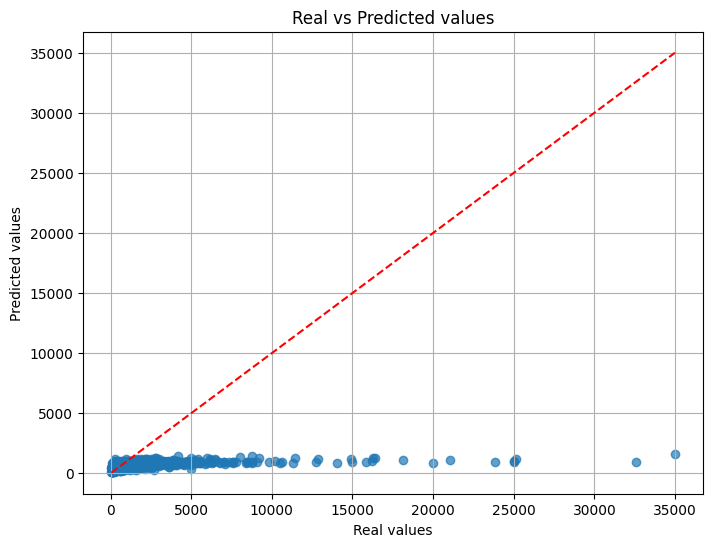

In [ ]:
import matplotlib.pyplot as plt

print(f'Erro relativo absoluto médio: {(np.abs(predictions - y_test) / y_test * 100).mean()}')

plt.figure(figsize=(8,6))
plt.scatter(y_test, predictions, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # perfect prediction line
plt.xlabel('Real values')
plt.ylabel('Predicted values')
plt.title('Real vs Predicted values')
plt.grid(True)
plt.show()

In [ ]:
# from sklearn.neural_network import MLPClassifier
# mlp = MLPClassifier(hidden_layer_sizes=(32, 8, 8, 8), activation="relu", max_iter=200,random_state=1)

# mlp.fit(X_train, y_train)

# predictions = mlp.predict(X_test)

# print(f'Erro relativo absoluto médio: {(np.abs(predictions - y_test) / y_test * 100).mean()}')

# plt.figure(figsize=(8,6))
# plt.scatter(y_test, predictions, alpha=0.7)
# plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # perfect prediction line
# plt.xlabel('Real values')
# plt.ylabel('Predicted values')
# plt.title('Real vs Predicted values')
# plt.grid(True)
# plt.show()

## Modelo 3: Usando One-Hot Encoding em Neighbourhood

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

#Dados one hot enconding - Executar apenas uma ou outra separação de dataset

X_train = X_one_train.copy()
X_test = X_one_test.copy()
y_train = y_one_train.copy()
y_test = y_one_test.copy()


In [ ]:
#Aplicando regra simples para a remoção de Outliers - Pode ser aprimorado

#Verificando tamanho antes da remoção
print(y_train.shape)

#Calculando os quartis do y_train
q1 = y_train.quantile(0.25)
q3 = y_train.quantile(0.75)
iqr = q3 - q1

#Definindo limites
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

#Criando filtro para manter apenas valores dentro dos limites
filtro = (y_train >= limite_inferior) & (y_train <= limite_superior)

#Aplicando o filtro tanto no X_train quanto no y_train
X_train = X_train[filtro]
y_train = y_train[filtro]

#Verificando tamanho após da remoção
print(y_train.shape)


(21116,)
(19604,)


In [ ]:
#Normalizando as entradas
scaler_X = StandardScaler()

X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

In [ ]:
#Criando e configurando o modelo
mlp = MLPRegressor(
    hidden_layer_sizes=(64, 32), #Definindo o tamanho das camandas ocultas
    activation='relu',           #O.B.S - Foi testado várias combinações diferentes de camadas ocultas,
    max_iter=500,                #mas o desempenho foi bem semelhante
    random_state=42,
    early_stopping=True,       #Permite a interrupção antecipada
    validation_fraction=0.2,   #Usa 20% do treino como validação
    n_iter_no_change=10,       #Interrompe depois de 10 épocas sem melhora
    verbose=True,              #Mostra o progresso do treinamento
)

mlp.fit(X_train, y_train)

#Fazendo as previsões
predictions = mlp.predict(X_test)

#Avaliando o modelo
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

print(f"Erro médio absoluto (MAE): {mae:.2f}")
print(f"Raiz do erro quadrático médio (RMSE): {rmse:.2f}")
print(f'Erro relativo absoluto médio: {(np.abs(predictions - y_test) / y_test * 100).mean()}')

Iteration 1, loss = 401332.85184202
Validation score: -2.413214
Iteration 2, loss = 373236.68446414
Validation score: -1.899523
Iteration 3, loss = 269645.65409396
Validation score: -0.662476
Iteration 4, loss = 132487.19722606
Validation score: 0.221859
Iteration 5, loss = 78247.55377608
Validation score: 0.387774
Iteration 6, loss = 68094.35031568
Validation score: 0.438290
Iteration 7, loss = 64311.62909199
Validation score: 0.458603
Iteration 8, loss = 62628.82177985
Validation score: 0.467737
Iteration 9, loss = 61845.94800530
Validation score: 0.471704
Iteration 10, loss = 61433.41846884
Validation score: 0.474164
Iteration 11, loss = 61184.36924174
Validation score: 0.476088
Iteration 12, loss = 60989.95995023
Validation score: 0.477769
Iteration 13, loss = 60845.72313480
Validation score: 0.478972
Iteration 14, loss = 60727.20786867
Validation score: 0.479798
Iteration 15, loss = 60599.29416458
Validation score: 0.480639
Iteration 16, loss = 60490.52362300
Validation score: 0.4

In [ ]:
# DataFrame para comparação das predições com os valores reais
comparison = pd.DataFrame({
    'Real': y_test,
    'Predicted': predictions,
    'Absolute Diff': y_test - predictions,
    'Relative Diff': (predictions - y_test) / y_test * 100,
    'Abs Relative Diff': np.abs((predictions - y_test) / y_test * 100)
})

# Ordenando em ordem crencente de erro relativo absoluto
comparison_sorted = comparison.sort_values(
    by='Abs Relative Diff',
    ascending=True
)

comparison_sorted.head(10)

,Real,Predicted,Absolute Diff,Relative Diff,Abs Relative Diff
16466,750.0,750.040684,-0.040684,0.005425,0.005425
26582,1500.0,1500.185358,-0.185358,0.012357,0.012357
9140,636.0,635.837437,0.162563,-0.025560,0.025560
35787,992.0,992.323880,-0.323880,0.032649,0.032649
33610,1200.0,1199.575839,0.424161,-0.035347,0.035347
31470,500.0,500.176948,-0.176948,0.035390,0.035390
18114,980.0,979.592672,0.407328,-0.041564,0.041564
27826,462.0,461.783993,0.216007,-0.046755,0.046755
14004,507.0,506.715466,0.284534,-0.056121,0.056121
22262,807.0,807.733447,-0.733447,0.090886,0.090886


Erro relativo absoluto médio: 51.37207774442153


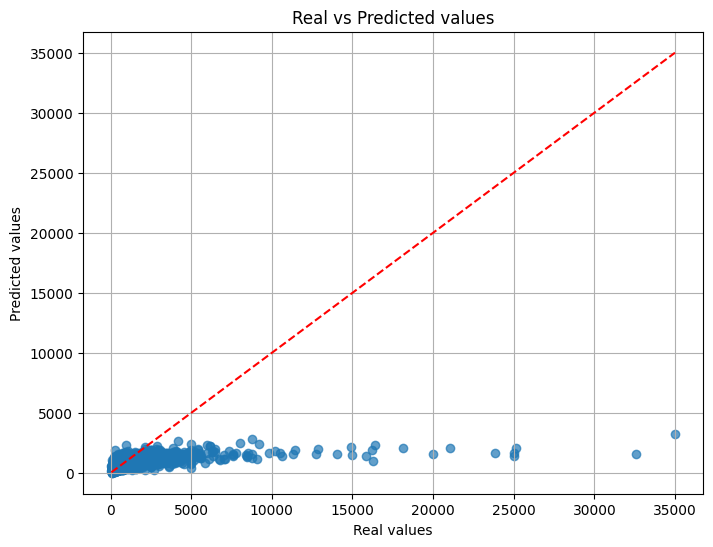

In [ ]:
print(f'Erro relativo absoluto médio: {(np.abs(predictions - y_test) / y_test * 100).mean()}')

plt.figure(figsize=(8,6))
plt.scatter(y_test, predictions, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # perfect prediction line
plt.xlabel('Real values')
plt.ylabel('Predicted values')
plt.title('Real vs Predicted values')
plt.grid(True)
plt.show()

## Modelo 4: *Testando Modelo de REGRESSÃO LINEAR*

In [ ]:
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# from sklearn.model_selection import train_test_split

# X_train = X_tar_train.copy()
# X_test = X_tar_test.copy()

# y_train = y_tar_train.copy()
# y_test = y_tar_test.copy()

In [ ]:
# model = LinearRegression()
# model.fit(X_train, y_train)


# y_train_pred = model.predict(X_train)
# y_test_pred = model.predict(X_test)

# def metricas(y_true, y_pred, dataset_name):
#     print(f"--- Métricas para {dataset_name} ---")
#     print(f"MAE:  {mean_absolute_error(y_true, y_pred):.2f}")
#     print(f"RMSE: {np.sqrt(mean_squared_error(y_true, y_pred)):.2f}")
#     print(f"R²:   {r2_score(y_true, y_pred):.2f}\n")

# metricas(y_train, y_train_pred, "Treinamento")
# metricas(y_test, y_test_pred, "Teste")



--- Métricas para Treinamento ---
MAE:  536.19
RMSE: 1453.23
R²:   0.23

--- Métricas para Teste ---
MAE:  525.33
RMSE: 1280.11
R²:   0.30



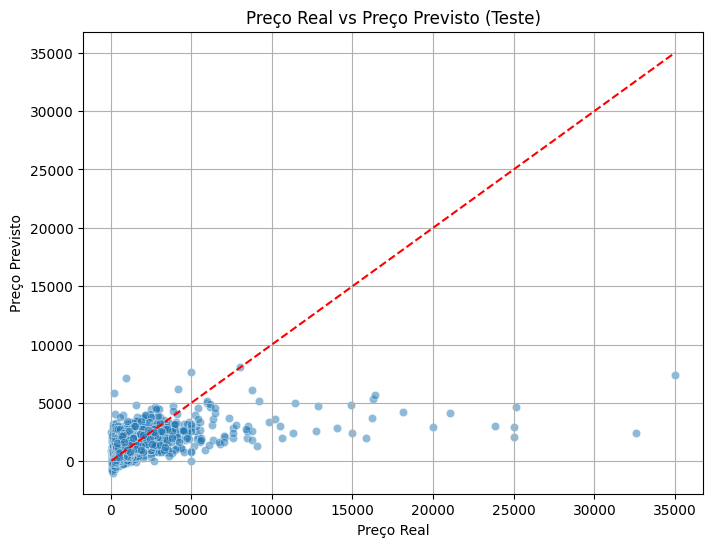

In [ ]:
# # 6.1. Comparação entre real vs previsto (teste)
# plt.figure(figsize=(8,6))
# sns.scatterplot(x=y_test, y=y_test_pred, alpha=0.5)
# plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
# plt.xlabel("Preço Real")
# plt.ylabel("Preço Previsto")
# plt.title("Preço Real vs Preço Previsto (Teste)")
# plt.grid(True)
# plt.show()

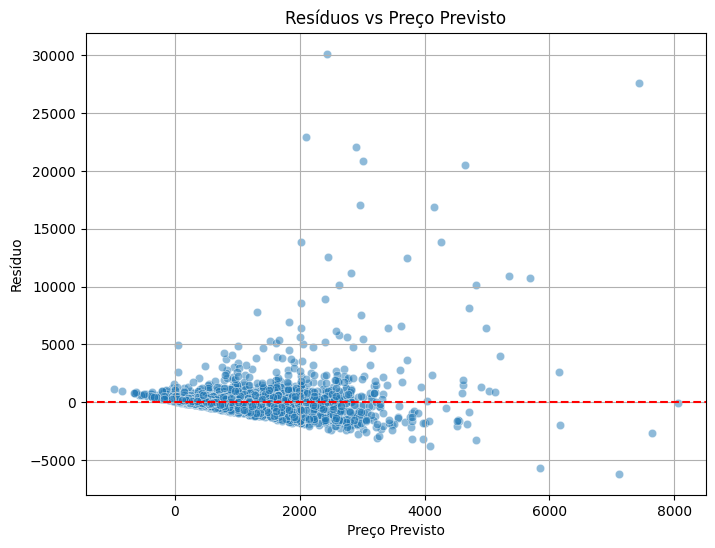

In [ ]:
# # 6.3. Resíduos vs Previsões
# plt.figure(figsize=(8,6))
# sns.scatterplot(x=y_test_pred, y=residuals, alpha=0.5)
# plt.axhline(0, color='red', linestyle='--')
# plt.xlabel("Preço Previsto")
# plt.ylabel("Resíduo")
# plt.title("Resíduos vs Preço Previsto")
# plt.grid(True)
# plt.show()